In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


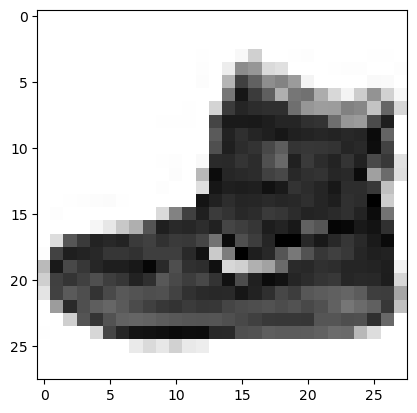

In [5]:
plt.imshow(X_train[0], cmap='Greys')

In [8]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [21]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               2769024   
                                                      

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_path = './data/model/all/fmnist-{epoch:03d}-{val_accuracy:.4f}-CNN.hdf5'
chkpt = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
stoppt = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split=0.25, batch_size=200, callbacks=[chkpt, stoppt])


Epoch 1: val_loss improved from inf to 2.30271, saving model to ./data/model/all\fmnist-001-0.0961-CNN.hdf5

Epoch 2: val_loss did not improve from 2.30271

Epoch 3: val_loss did not improve from 2.30271

Epoch 4: val_loss did not improve from 2.30271

Epoch 5: val_loss improved from 2.30271 to 2.30269, saving model to ./data/model/all\fmnist-005-0.0961-CNN.hdf5

Epoch 6: val_loss did not improve from 2.30269

Epoch 7: val_loss did not improve from 2.30269

Epoch 8: val_loss did not improve from 2.30269

Epoch 9: val_loss did not improve from 2.30269

Epoch 10: val_loss did not improve from 2.30269

Epoch 11: val_loss did not improve from 2.30269

Epoch 12: val_loss did not improve from 2.30269

Epoch 13: val_loss did not improve from 2.30269

Epoch 14: val_loss did not improve from 2.30269

Epoch 15: val_loss did not improve from 2.30269


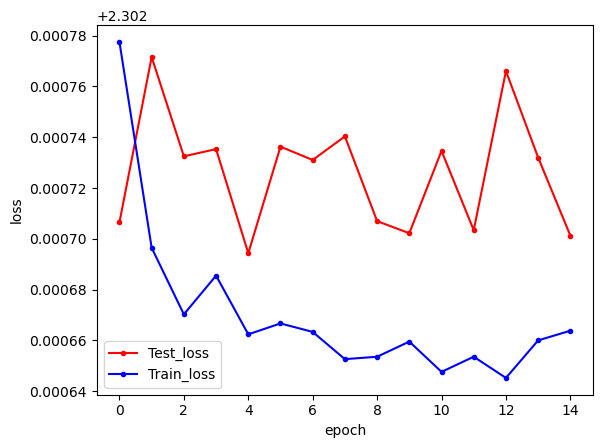

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='Test_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='Train_loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [24]:
# 학습정확도, 검증정확도, 테스트 정확도 출력
print('학습 정확도 : ', history.history['accuracy'][-1])
print('검증 정확도 : ', history.history['val_accuracy'][-1])
print('테스트 정확도 : ', history.history['accuracy'][-1])
print('학습정확도 : ', model.evaluate(X_test, y_test)[1])

학습 정확도 :  0.10019999742507935
검증 정확도 :  0.0960666686296463
테스트 정확도 :  0.10019999742507935
313/313 [==============================] - 9s 28ms/step - loss: 2.3167 - accuracy: 0.0846
학습정확도 :  0.08460000157356262
